In [ ]:
# импортируйте нужные библиотеки

In [ ]:
# сгенерируйте линейно разделимую выборку для задачи бинарной классификации

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\dfrac{1}{n}\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

In [1]:
from IPython.display import Image

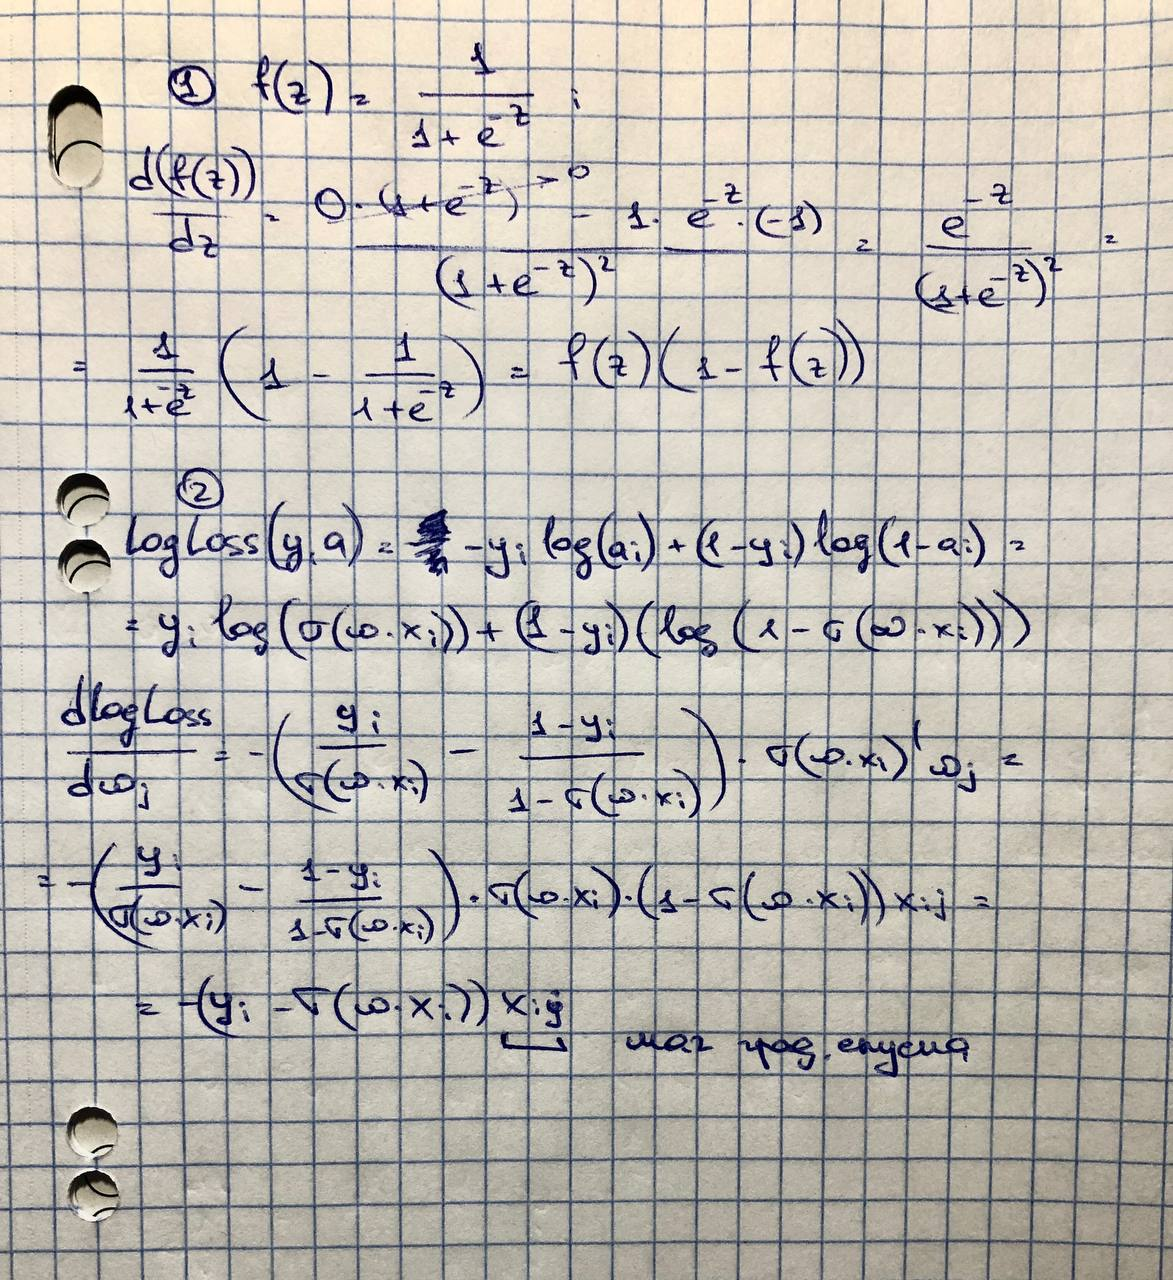

In [3]:
Image("./reshenie_photo.jpg", width=700, height=500)

#### Задание №2. Напишите собственную логистическую регрессию

In [1]:
import numpy as np
import math
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

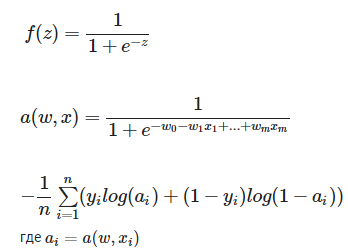

In [6]:
Image("./formuls.png", width=300, height=200)

In [2]:
def sigmoid_func(X):
    return 1/(1 + math.e**(-X))


class MyLogRegression:
    
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
    
    def fit( self, X, Y ) :        
        self.W = np.zeros(X.shape[1])        
        
        for i in range( self.iterations ) :
            self.W -= self.learning_rate * np.dot(X.T, sigmoid_func(np.dot(X, self.W)) - Y) / Y.size
        return self

    def predict(self, X):
        Y = np.array([np.where(sigmoid_func(np.dot(x, self.W)) > 0.5, 1, 0) for x in X])
        return Y  


In [3]:
sepr = False

while not sepr:
    samples = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    sepr = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])

X_train, X_test, y_train, y_test = train_test_split(samples[0], samples[1], test_size = 0.2, random_state = 0)

In [ ]:
# можно проверить на iris
# https://habr.com/ru/companies/ods/articles/484148/
# iris = datasets.load_iris()
# X = iris["data"]
# Y = (iris["target"] == 0).astype(int) # return 1 если Iris Versicolor, иначе 0
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

Тестирование sklearn

In [4]:
def sklearn_test():
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    classifier.intercept_, classifier.coef_
    y_pred = classifier.predict(X_test)
    print('Accuracy sklearn: ', accuracy_score(y_test, y_pred))


sklearn_test()


Accuracy sklearn:  1.0


Тестирование myLogReg

In [5]:
def column(matrix, i):
    return [row[i] for row in matrix]


def my_logreg_test():

    model = MyLogRegression(learning_rate = 0.01, iterations = 10000)
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    print( "Accuracy myLogReg:  ", accuracy_score(y_test, Y_pred))


my_logreg_test()


Accuracy myLogReg:   1.0
